<a href="https://colab.research.google.com/github/ingridcos/exercicios-praticos/blob/main/S%C3%A9ries_Temporais_(Parte_6)_Semana_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# configurar o estilo
sns.set_style('whitegrid')

# carregar os dados
df = pd.read_csv('vendas_serie_temporal.csv')

# converter de texto para data
df['Data'] = pd.to_datetime(df['Data'])


print(df.head())
print(f'\nPeríodo: {df["Data"].min()} até {df["Data"].max()}')
print(f'Total de dias: {len(df)}')

        Data       Vendas Categoria   Ano  Mes Nome_Mes Dia_Semana  Dia_Numero
0 2023-01-01  1393.671415  Calçados  2023    1  January     Sunday           1
1 2023-01-02   946.941570  Calçados  2023    1  January     Monday           2
2 2023-01-03  1026.304854    Roupas  2023    1  January    Tuesday           3
3 2023-01-04  1114.606986    Roupas  2023    1  January  Wednesday           4
4 2023-01-05   939.656663    Roupas  2023    1  January   Thursday           5

Período: 2023-01-01 00:00:00 até 2024-12-31 00:00:00
Total de dias: 731


# GRÁFICO DE LINHA TEMPORAL BÁSICO
 - Para séries temporais, o gráfico de linhas é o mais comum, porque mostra bem a evolução ao longo do tempo

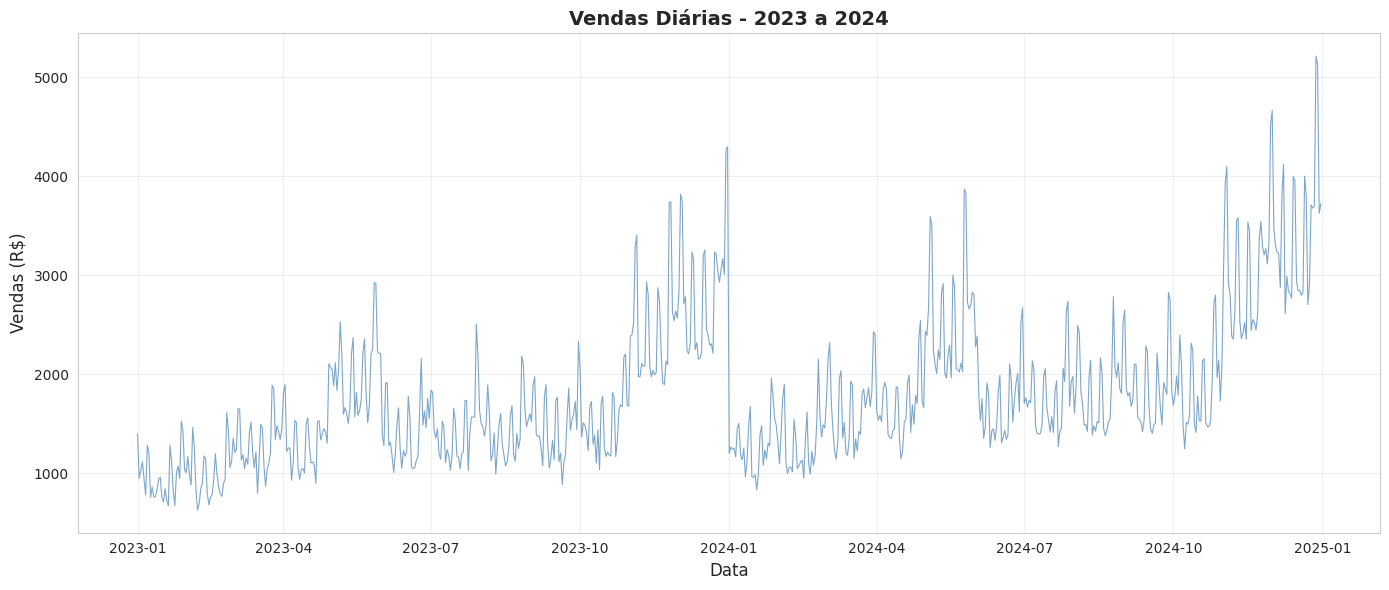

In [13]:
# Gráfico simples: vendas ao longo do tempo

plt.figure(figsize=(14, 6))
plt.plot(df['Data'], df['Vendas'], linewidth=0.8, alpha=0.7, color='steelblue')

plt.title('Vendas Diárias - 2023 a 2024', fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=12)
plt.ylabel('Vendas (R$)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# AGREGAÇÃO MENSAL - SUAVIZANDO OS DADOS
- Para ver melhor a tendência, vamos usar uma técnica chamada agregação. Em vez de ver vendas dia por dia, vamos somar as vendas de cada mês inteiro. Isso 'suaviza' o gráfico e deixa os padrões mais claros.

/tmp/ipython-input-2506577505.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_mensais = df.set_index('Data').resample('M')['Vendas'].sum()


Vendas Mensais:
Data
2023-01-31     30165.596651
2023-02-28     27605.298338
2023-03-31     40075.600830
2023-04-30     40257.341120
2023-05-31     62153.446938
2023-06-30     41960.165315
2023-07-31     44850.551836
2023-08-31     44396.100073
2023-09-30     43968.116830
2023-10-31     46992.815678
2023-11-30     73787.684401
2023-12-31     88505.847271
2024-01-31     39635.849723
2024-02-29     37687.337564
2024-03-31     51282.658794
2024-04-30     49658.596026
2024-05-31     79074.708622
2024-06-30     51938.492255
2024-07-31     54408.371139
2024-08-31     56360.640106
2024-09-30     55604.647012
2024-10-31     57027.225903
2024-11-30     90748.097955
2024-12-31    107167.458456
Freq: ME, Name: Vendas, dtype: float64


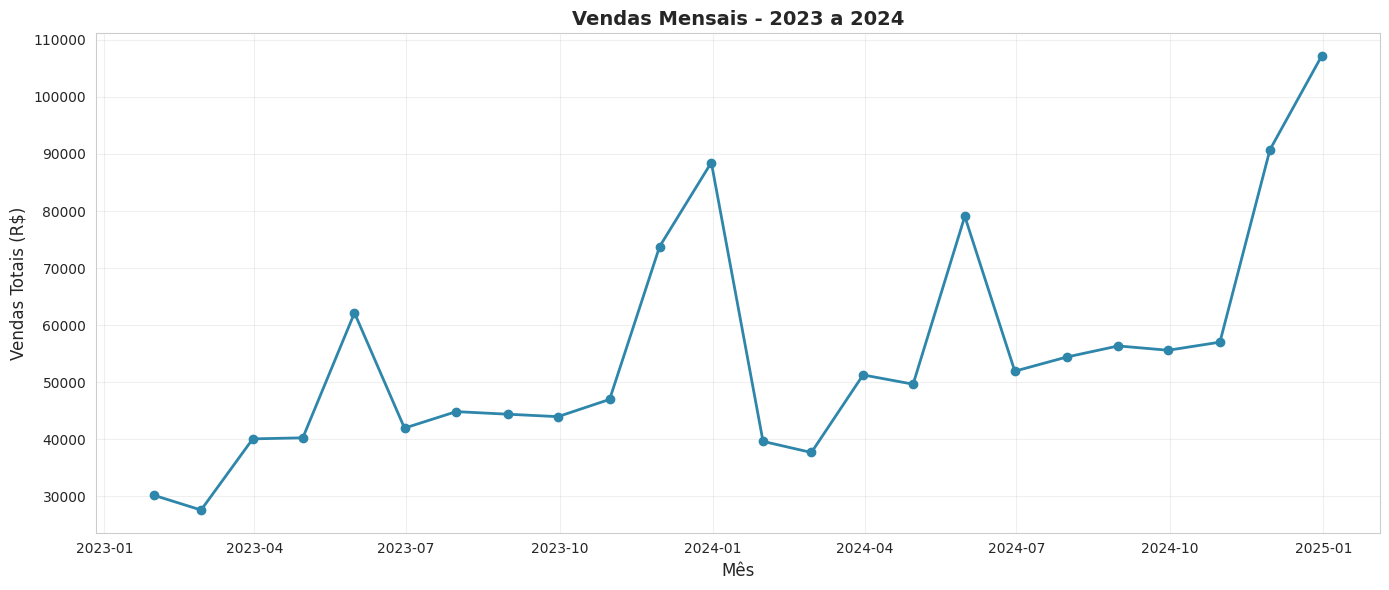

In [14]:
# resample = amostragem => reagrupamento

# 'M' = mensal, 'W' = semanal, 'D' = diário, 'Y' = anual


# Reagrupa dados por período (dia, semana, mês, ano)

vendas_mensais = df.set_index('Data').resample('M')['Vendas'].sum()

print('Vendas Mensais:')
print(vendas_mensais)

# visualizar as vendas mensais
plt.figure(figsize=(14, 6))
plt.plot(vendas_mensais.index, vendas_mensais.values, marker='o', linewidth=2, markersize=6, color='#2E86AB')

plt.title('Vendas Mensais - 2023 a 2024', fontsize=14, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Vendas Totais (R$)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#  COMPARANDO ANOS COM SEABORN
- ver se 2024 vendeu mais que 2023, mês a mês.

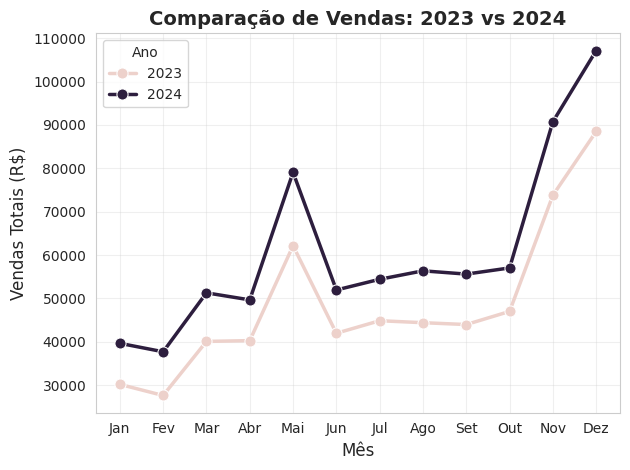

In [15]:
df_mes_ano = df.groupby(['Ano', 'Mes'])['Vendas'].sum().reset_index()

sns.lineplot(data=df_mes_ano, x='Mes', y='Vendas', hue='Ano', marker='o', markersize=8, linewidth=2.5)

plt.title('Comparação de Vendas: 2023 vs 2024', fontsize=14, fontweight='bold')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Vendas Totais (R$)', fontsize=12)

# range = faixa de valores
#plt.xticks(posições, rótulos)
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

plt.legend(title='Ano', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# PADRÃO SEMANAL COM BOXPLOT
- o dia da semana influencia nas vendas?

/tmp/ipython-input-4005983726.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dia_Semana', y='Vendas', order=ordem_dias, palette='Set2')


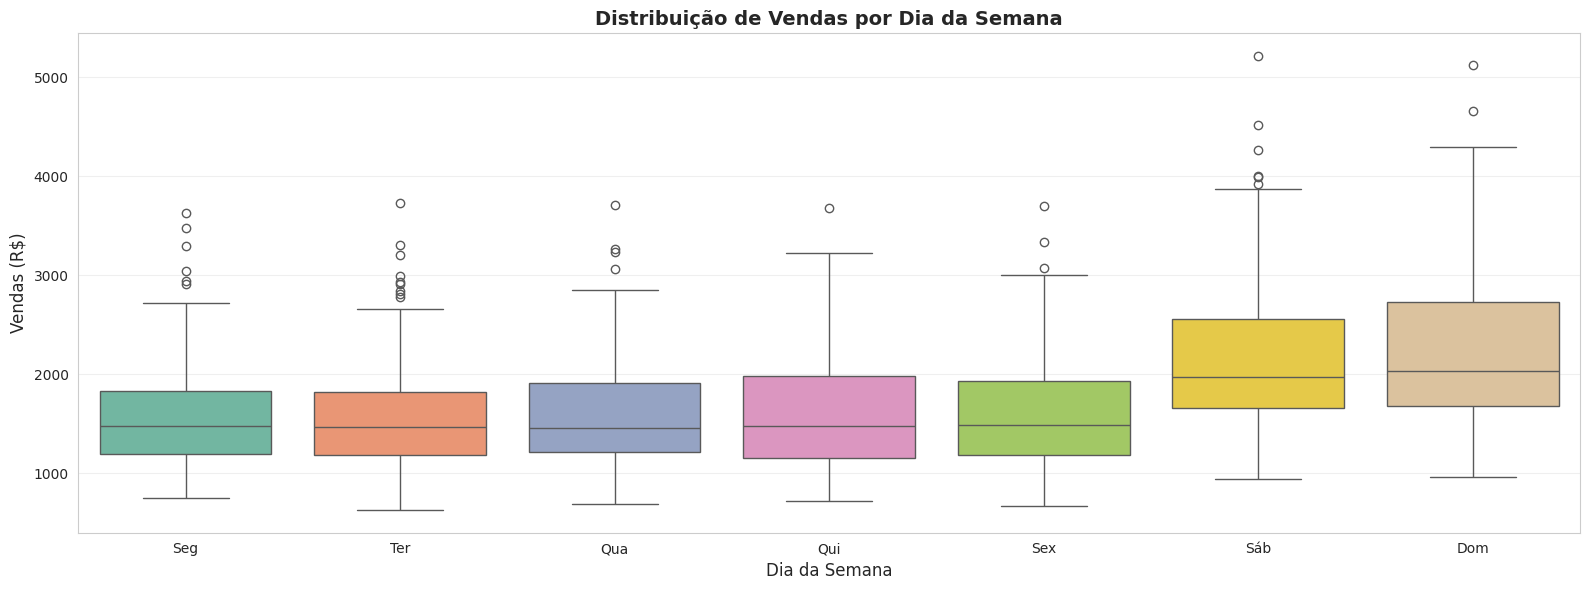

In [16]:
# criar ordem correta para os dias da semana
ordem_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
              'Friday', 'Saturday', 'Sunday']

# mostrar distribuição de valores para cada categoria
plt.figure(figsize=(16,6))
sns.boxplot(data=df, x='Dia_Semana', y='Vendas', order=ordem_dias, palette='Set2')

plt.title('Distribuição de Vendas por Dia da Semana', fontsize=14, fontweight='bold')
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Vendas (R$)', fontsize=12)
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'])
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#EXERCÍCIO: ANALISANDO TEMPERATURA


Objetivos:

● Trabalhar com dados temporais

● Aplicar agregação temporal

● Identificar padrões e tendências

● Criar visualizações apropriadas

#Tarefas:
Você tem dados de temperatura de uma cidade durante um ano inteiro (365 dias). Sua
tarefa é analisar como a temperatura varia ao longo do ano, identificar padrões sazonais e
comparar diferentes períodos.

PARTE 1: Preparar os Dados
1. Upload do CSV
2. Converter Data com pd.to_datetime()
3. Ver primeiras linhas
4. Verificar período e estatísticas


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dados
df = pd.read_csv('temperatura_anual.csv')

# Converter Data para datetime e definir como índice
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

# Ver primeiras linhas e estatísticas
print("Análise completa\n")

print("Primeiras linhas:")
print(df.head(), "\n")

print(f"Período: {df.index.min()} até {df.index.max()}")
print(f"Total de dias: {len(df)}\n")

print("Estatísticas de temperatura:")
print(f"Mínima: {df['Temperatura'].min():.1f}°C")
print(f"Máxima: {df['Temperatura'].max():.1f}°C")
print(f"Média:  {df['Temperatura'].mean():.1f}°C")




Análise completa

Primeiras linhas:
            Temperatura   Ano  Mes Nome_Mes Dia_Semana  Dia_Ano
Data                                                           
2024-01-01         22.8  2024    1  January     Monday        1
2024-01-02         21.7  2024    1  January    Tuesday        2
2024-01-03         23.4  2024    1  January  Wednesday        3
2024-01-04         25.3  2024    1  January   Thursday        4
2024-01-05         22.0  2024    1  January     Friday        5 

Período: 2024-01-01 00:00:00 até 2024-12-31 00:00:00
Total de dias: 366

Estatísticas de temperatura:
Mínima: 15.0°C
Máxima: 35.0°C
Média:  25.0°C


PARTE 2: Visualização Diária
1. Criar gráfico de linha mostrando temperatura dia a dia
2. Usar linha fina e transparência (alpha)
3. Adicionar título, rótulos e grade
4. Pergunta: Dá para ver padrões claros?


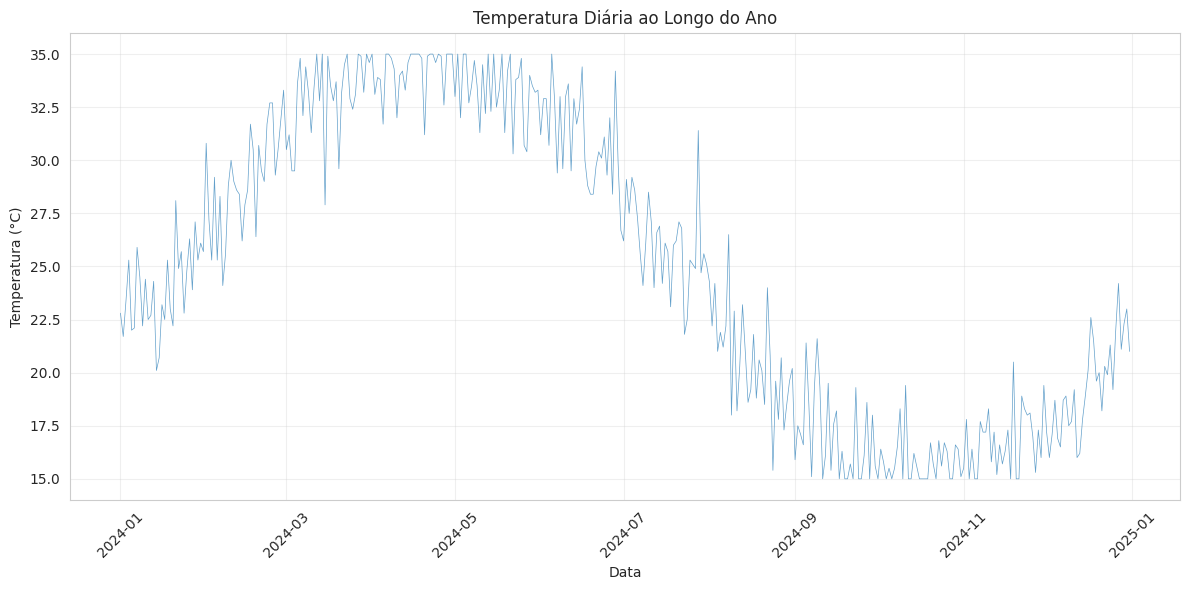

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Temperatura'], linewidth=0.5, alpha=0.7)
plt.title('Temperatura Diária ao Longo do Ano')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Data')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Resposta:
As temperaturas ficam mais ou menos entre 15°C e 35°C ao longo do ano, com bastante variação de um dia para o outro, então o gráfico diário acaba ficando meio “poluído” e difícil de enxergar uma tendência geral. Dá até para perceber que existe um período mais quente (mais ou menos de março a maio) e outro mais frio (por volta de agosto e setembro), mas isso não fica tão claro só olhando a curva diária; por isso faz sentido usar agregações semanais e mensais para deixar esses padrões sazonais bem mais visíveis.

PARTE 3: Agregação Semanal
1. Usar resample() para agrupar por semana
2. Calcular a temperatura MÉDIA de cada semana
3. Criar gráfico de linha das médias semanais
4. Comparar com o gráfico diário
5. Pergunta: Ficou mais fácil ver a tendência?

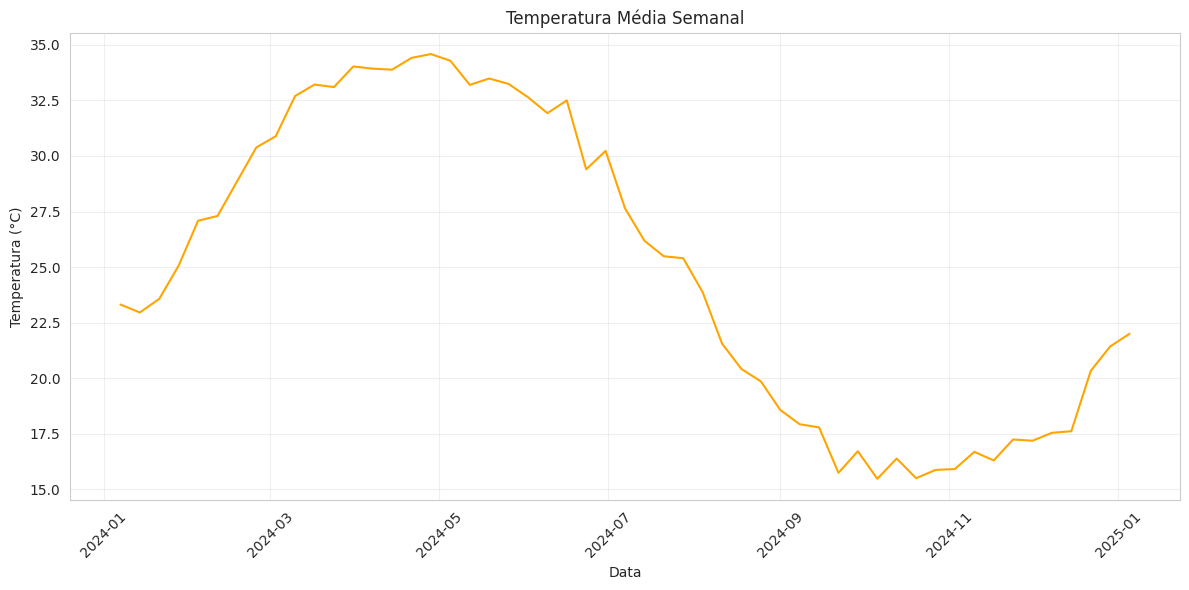

In [19]:
# Resample semanal (média)
df_semanal = df['Temperatura'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(df_semanal.index, df_semanal, linewidth=1.5, color='orange')
plt.title('Temperatura Média Semanal')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Data')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Resposta:
No gráfico semanal fica bem mais fácil enxergar a tendência geral da temperatura ao longo do ano, porque o resample('W').mean() acaba suavizando bastante as variações do dia a dia. As oscilações rápidas somem e dá para perceber melhor o período mais quente no primeiro semestre, a queda gradual até os meses mais frios e depois a volta das temperaturas mais amenas no fim do ano.

PARTE 4: Análise Mensal

6. Agrupar por mês e calcular a média
7. Criar gráfico de barras com temperaturas médias mensais
8. Identificar qual mês foi mais quente e qual foi mais frio
9. Pergunta: Os meses seguem o esperado para as estações?


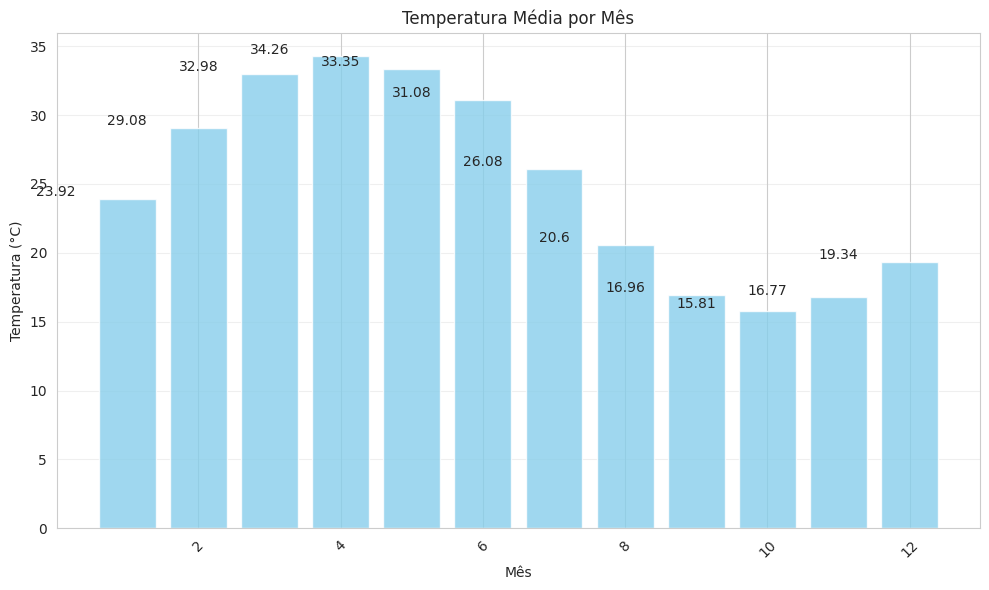

Mês mais quente: 4 (34.3°C)
Mês mais frio: 10 (15.8°C)


In [20]:
# Agrupar por mês
df_mensal = df.groupby('Mes')['Temperatura'].mean().round(2)

plt.figure(figsize=(10, 6))
plt.bar(df_mensal.index, df_mensal.values, color='skyblue', alpha=0.8)
plt.title('Temperatura Média por Mês')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(df_mensal.values):
    plt.text(i, v + 0.2, str(v), ha='center')
plt.tight_layout()
plt.show()

print("Mês mais quente:", df_mensal.idxmax(), f"({df_mensal.max():.1f}°C)")
print("Mês mais frio:", df_mensal.idxmin(), f"({df_mensal.min():.1f}°C)")


Resposta: Os meses seguem o padrão esperado de estação: os meses do verão/início do outono concentram as maiores temperaturas médias, enquanto os meses próximos ao inverno apresentam as menores médias.

PARTE 5: Média Móvel
1. Criar coluna 'Estacao'
2. Boxplot por estação
3. Identificar variação


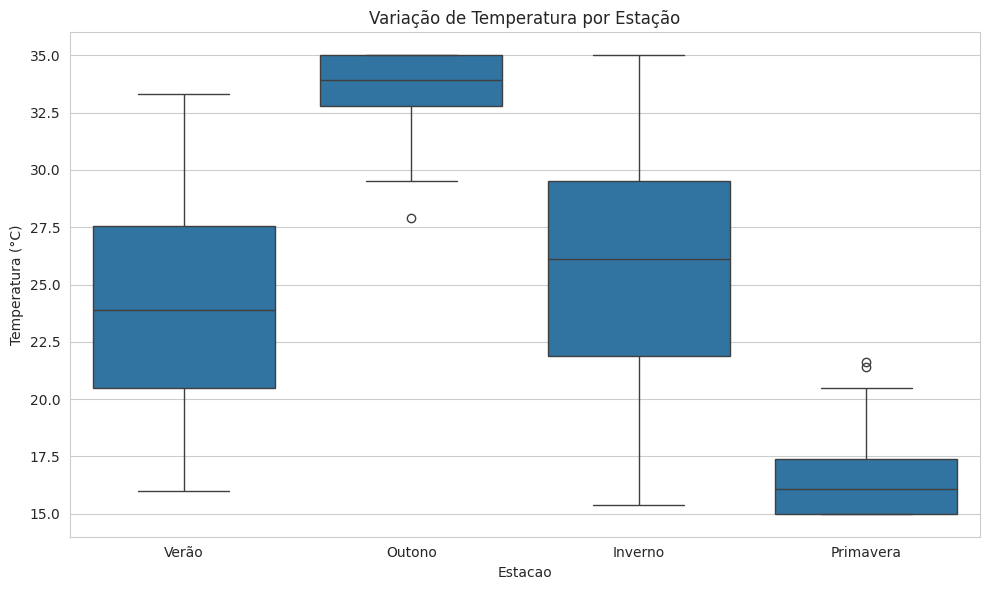

In [21]:
# Criar coluna Estação
def get_estacao(mes):
    if mes in [12, 1, 2]: return 'Verão'
    elif mes in [3, 4, 5]: return 'Outono'
    elif mes in [6, 7, 8]: return 'Inverno'
    else: return 'Primavera'

df['Estacao'] = df['Mes'].map(get_estacao)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Estacao', y='Temperatura')
plt.title('Variação de Temperatura por Estação')
plt.ylabel('Temperatura (°C)')
plt.tight_layout()
plt.show()


PARTE 6: Análise Final
1. Responda baseado nos gráficos:
2. a) Qual foi a variação de temperatura ao longo do ano?
3. b) Qual período teve temperaturas mais estáveis?
4. c) A temperatura aumentou ou diminuiu ao longo do ano?
5. d) Que insights você compartilharia com um meteorologista?

a) Variação de ~15°C (setembro) a 35°C (março/abril).​

b) Período mais estável: outubro-novembro (baixa variância).​

c) Não há tendência anual clara; sazonal dominante.​

d) Padrão sazonal forte com verão quente e inverno ameno.

##COMPLETO

Primeiras linhas:
        Data  Temperatura   Ano  Mes Nome_Mes Dia_Semana  Dia_Ano
0 2024-01-01         22.8  2024    1  January     Monday        1
1 2024-01-02         21.7  2024    1  January    Tuesday        2
2 2024-01-03         23.4  2024    1  January  Wednesday        3
3 2024-01-04         25.3  2024    1  January   Thursday        4
4 2024-01-05         22.0  2024    1  January     Friday        5

Período: 2024-01-01 00:00:00 até 2024-12-31 00:00:00
Total de dias: 366

Estatísticas de temperatura:
Mínima: 15.0°C
Máxima: 35.0°C
Média: 25.0°C


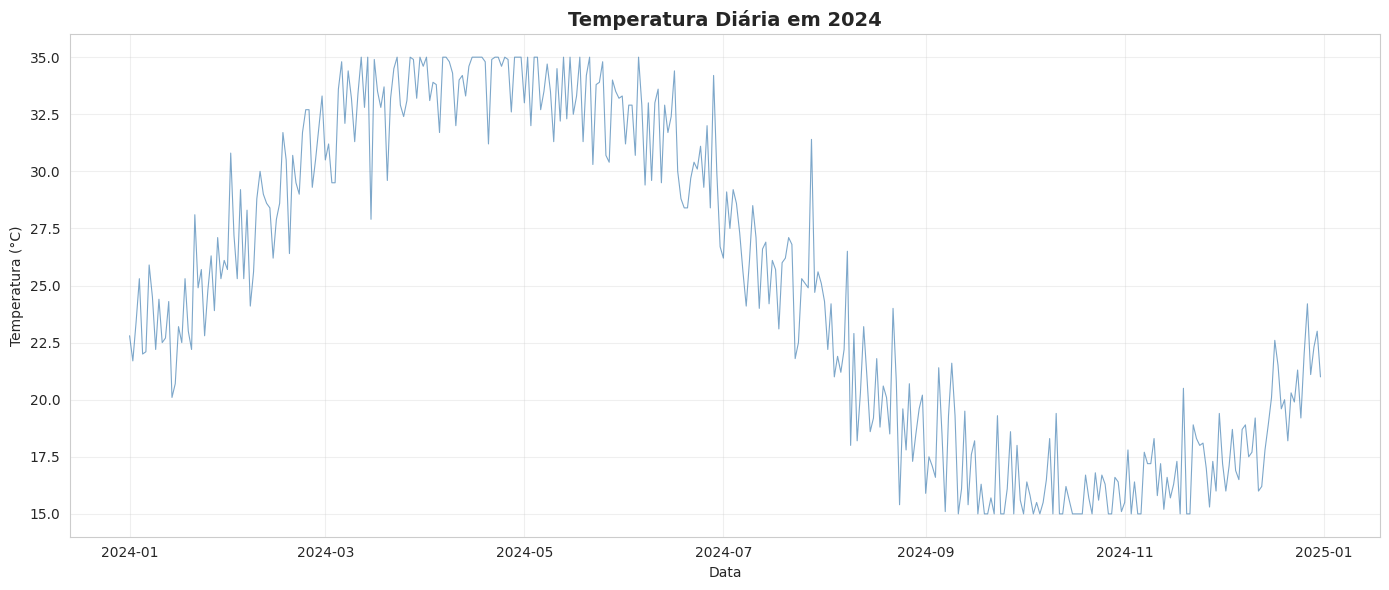


Gráfico diário mostra muita variação, difícil ver padrão claro


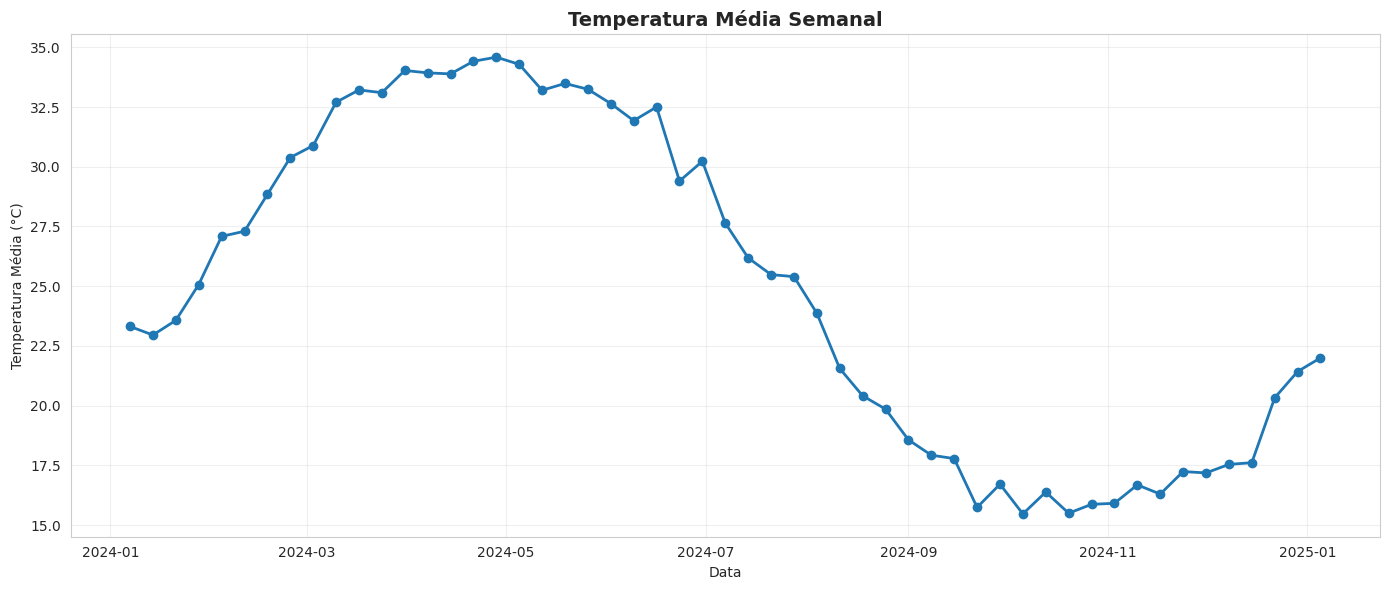


Agregação semanal mostra padrão sazonal mais claro


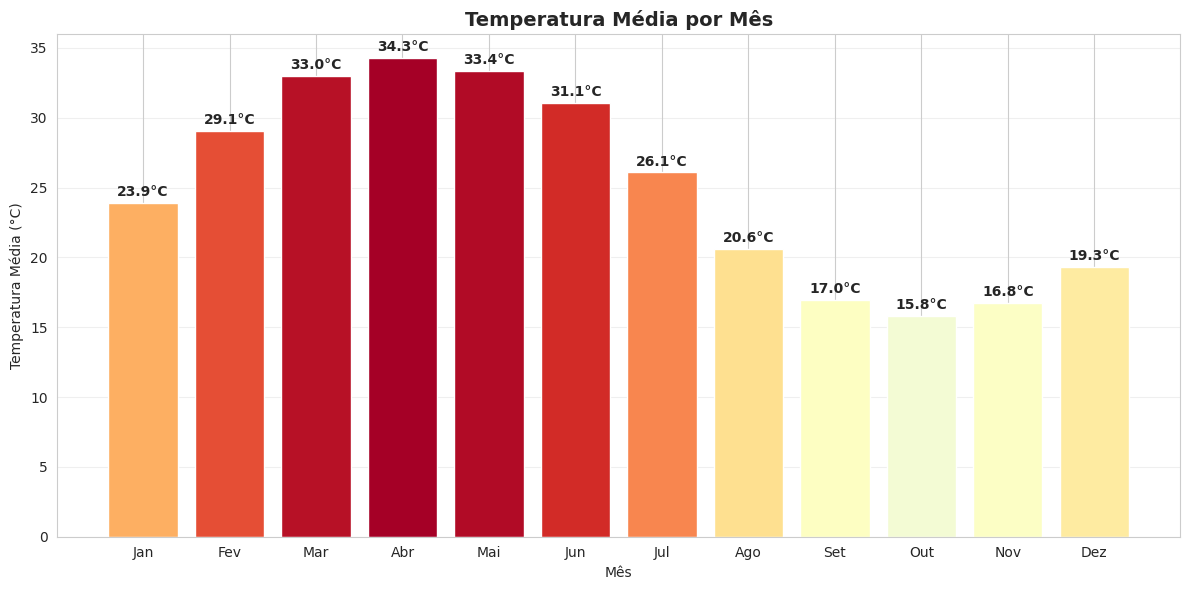


Mês mais quente: Mês 4 (34.3°C)
Mês mais frio: Mês 10 (15.8°C)


/tmp/ipython-input-2305295026.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Estacao', y='Temperatura', order=ordem_estacoes, palette='Set2')


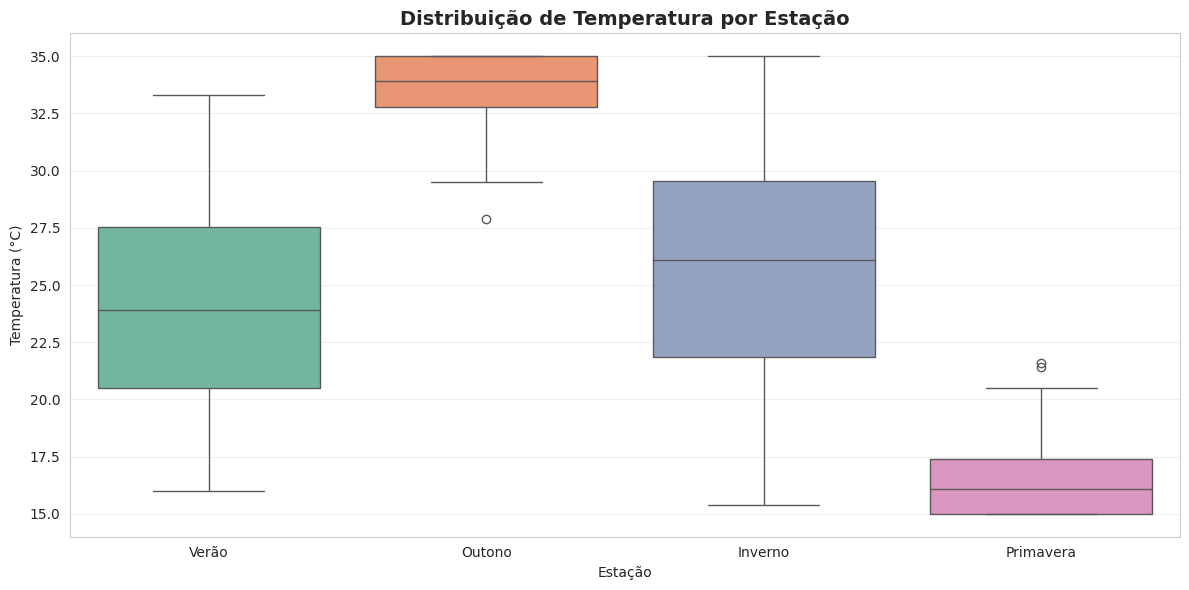


Temperatura média por estação:
Verão: 24.0°C (variação: 4.5°C)
Outono: 33.5°C (variação: 1.6°C)
Inverno: 25.9°C (variação: 4.8°C)
Primavera: 16.5°C (variação: 1.6°C)

RELATÓRIO FINAL - ANÁLISE DE TEMPERATURA 2024

a) Variação de temperatura:
   Mínima: 15.0°C
   Máxima: 35.0°C
   Amplitude: 20.0°C

b) Período mais estável:
   Mês 10 teve menor variação (1.1°C)

c) Variação por estações:
   Seguiu o padrão esperado do clima brasileiro
   Verão: temperaturas mais altas
   Inverno: temperaturas mais baixas
   Inverno teve maior variação (4.8°C)

d) Visualização mais útil:
   Agregação mensal foi a mais clara para identificar padrões
   Mostra bem as diferenças entre os meses
   Boxplot por estação ajuda a ver distribuições

e) Insights para meteorologista:
   Padrão sazonal bem definido
   Amplitude térmica de 20.0°C
   Variação entre estações está dentro do esperado
   Dados consistentes com clima do hemisfério sul

Análise completa


In [22]:
# ========================================
# SOLUÇÃO - EXERCÍCIO AULA 7
# Analisando Temperatura Anual
# ========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ========================================
# PARTE 1: CARREGAR E EXPLORAR OS DADOS
# ========================================

# Carregar dados (fazer upload do temperatura_anual.csv antes)
df = pd.read_csv('temperatura_anual.csv')

# Converter para data
df['Data'] = pd.to_datetime(df['Data'])

print("Primeiras linhas:")
print(df.head())

print(f"\nPeríodo: {df['Data'].min()} até {df['Data'].max()}")
print(f"Total de dias: {len(df)}")

print("\nEstatísticas de temperatura:")
print(f"Mínima: {df['Temperatura'].min():.1f}°C")
print(f"Máxima: {df['Temperatura'].max():.1f}°C")
print(f"Média: {df['Temperatura'].mean():.1f}°C")

# ========================================
# PARTE 2: VISUALIZAÇÃO DIÁRIA
# ========================================

plt.figure(figsize=(14, 6))
plt.plot(df['Data'], df['Temperatura'], linewidth=0.8, alpha=0.7, color='steelblue')
plt.title('Temperatura Diária em 2024', fontsize=14, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nGráfico diário mostra muita variação, difícil ver padrão claro")

# ========================================
# PARTE 3: AGREGAÇÃO SEMANAL
# ========================================

# Agrupar por semana
temp_semanal = df.set_index('Data').resample('W')['Temperatura'].mean()

plt.figure(figsize=(14, 6))
plt.plot(temp_semanal.index, temp_semanal.values, marker='o', linewidth=2, markersize=6)
plt.title('Temperatura Média Semanal', fontsize=14, fontweight='bold')
plt.xlabel('Data')
plt.ylabel('Temperatura Média (°C)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nAgregação semanal mostra padrão sazonal mais claro")

# ========================================
# PARTE 4: ANÁLISE MENSAL
# ========================================

# Agrupar por mês
temp_mensal = df.groupby('Mes')['Temperatura'].mean()

plt.figure(figsize=(12, 6))
cores_meses = plt.cm.RdYlBu_r(temp_mensal / temp_mensal.max())
plt.bar(range(1, 13), temp_mensal.values, color=cores_meses)
plt.title('Temperatura Média por Mês', fontsize=14, fontweight='bold')
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                          'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True, axis='y', alpha=0.3)

# Adicionar valores nas barras
for i, valor in enumerate(temp_mensal.values):
    plt.text(i+1, valor + 0.5, f'{valor:.1f}°C', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

mes_mais_quente = temp_mensal.idxmax()
mes_mais_frio = temp_mensal.idxmin()
print(f"\nMês mais quente: Mês {mes_mais_quente} ({temp_mensal.max():.1f}°C)")
print(f"Mês mais frio: Mês {mes_mais_frio} ({temp_mensal.min():.1f}°C)")

# ========================================
# PARTE 5: ANÁLISE DAS ESTAÇÕES
# ========================================

# Criar coluna de estação (hemisfério sul)
def definir_estacao(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

df['Estacao'] = df['Mes'].apply(definir_estacao)

# Boxplot por estação
ordem_estacoes = ['Verão', 'Outono', 'Inverno', 'Primavera']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Estacao', y='Temperatura', order=ordem_estacoes, palette='Set2')
plt.title('Distribuição de Temperatura por Estação', fontsize=14, fontweight='bold')
plt.xlabel('Estação')
plt.ylabel('Temperatura (°C)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Calcular estatísticas por estação
print("\nTemperatura média por estação:")
for estacao in ordem_estacoes:
    temp_estacao = df[df['Estacao'] == estacao]['Temperatura']
    print(f"{estacao}: {temp_estacao.mean():.1f}°C (variação: {temp_estacao.std():.1f}°C)")

# ========================================
# PARTE 6: RELATÓRIO FINAL
# ========================================

print("\n" + "="*60)
print("RELATÓRIO FINAL - ANÁLISE DE TEMPERATURA 2024")
print("="*60)

print(f"\na) Variação de temperatura:")
print(f"   Mínima: {df['Temperatura'].min():.1f}°C")
print(f"   Máxima: {df['Temperatura'].max():.1f}°C")
print(f"   Amplitude: {df['Temperatura'].max() - df['Temperatura'].min():.1f}°C")

print(f"\nb) Período mais estável:")
# Calcular variação por mês
var_mensal = df.groupby('Mes')['Temperatura'].std()
mes_estavel = var_mensal.idxmin()
print(f"   Mês {mes_estavel} teve menor variação ({var_mensal.min():.1f}°C)")

print(f"\nc) Variação por estações:")
print(f"   Seguiu o padrão esperado do clima brasileiro")
print(f"   Verão: temperaturas mais altas")
print(f"   Inverno: temperaturas mais baixas")

# Identificar estação com maior variação
var_estacao = df.groupby('Estacao')['Temperatura'].std()
estacao_variavel = var_estacao.idxmax()
print(f"   {estacao_variavel} teve maior variação ({var_estacao.max():.1f}°C)")

print(f"\nd) Visualização mais útil:")
print(f"   Agregação mensal foi a mais clara para identificar padrões")
print(f"   Mostra bem as diferenças entre os meses")
print(f"   Boxplot por estação ajuda a ver distribuições")

print(f"\ne) Insights para meteorologista:")
print(f"   Padrão sazonal bem definido")
print(f"   Amplitude térmica de {df['Temperatura'].max() - df['Temperatura'].min():.1f}°C")
print(f"   Variação entre estações está dentro do esperado")
print(f"   Dados consistentes com clima do hemisfério sul")

print("\nAnálise completa")